In [1]:
!pip install opencv-python

In [45]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

print('finished this step')

print('finished this step')

finished this step
finished this step


In [46]:
# Define image dimensions (all images will be resized to these dimensions)
img_size = 24

print('finished this step')

finished this step


In [47]:
# Load images from folders
def load_images(folder, label):
    images = []
    labels = []
    # Loop through all the files in the folder
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            # Read the image file
            img = cv2.imread(img_path)
            # Convert the image to RGB color space
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Resize the image to the defined dimensions
            img = cv2.resize(img, (img_size, img_size))  
            # Add the image and its label to the lists
            images.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Error: {e}")
    return images, labels

print('finished this step')

finished this step


In [50]:
# Define folder paths
crypto_folder = 'C:/Users/JB//Desktop/UChicago/Machine Learning/Final/punks/'
celebrity_folder = 'C:/Users/JB/Desktop/UChicago/Machine Learning/Final/celebrities/'

print('finished this step')

finished this step


In [51]:
# Load images and labels from each folder
crypto_images, crypto_labels = load_images(crypto_folder, 0) # we use 0 as the label for cryptopunks
celebrity_images, celebrity_labels = load_images(celebrity_folder, 1) # we use 1 as the label for celebrities

print('finished this step')

finished this step


In [52]:
# Combine the lists of images and labels
images = crypto_images + celebrity_images
labels = crypto_labels + celebrity_labels

print('finished this step')

finished this step


In [53]:
# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

print('finished this step')

finished this step


In [54]:
# Normalize the image data (original pixel values are 0-255, but we need them to be between 0-1)
images = images / 255.0

# Convert labels to one-hot encoding (this is needed for the neural network)
labels = to_categorical(labels)

print('finished this step')

finished this step


In [55]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print('finished this step')

finished this step


In [56]:
# Define the neural network structure
model = Sequential([
    # First convolution layer: 32 filters, 3x3 kernel size
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    # Max pooling layer: 2x2 pool size
    MaxPooling2D((2, 2)),
    # Second convolution layer: 64 filters, 3x3 kernel size
    Conv2D(64, (3, 3), activation='relu'),
    # Another max pooling layer
    MaxPooling2D((2, 2)),
    # Flatten layer to convert 2D data to 1D
    Flatten(),
    # Dense layer with 64 neurons
    Dense(64, activation='relu'),
    # Dropout layer to reduce overfitting
    Dropout(0.5),
    # Output layer with 2 neurons (since we have 2 classes: cryptopunks and celebrities)
    Dense(2, activation='softmax')  
])

print('finished this step')

finished this step


In [57]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print('finished this step')

finished this step


In [58]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
78/78 [==============================] - 5s 39ms/step - loss: 0.2546 - accuracy: 0.8983 - val_loss: 0.0572 - val_accuracy: 0.9775
Epoch 2/10
78/78 [==============================] - 2s 31ms/step - loss: 0.0370 - accuracy: 0.9904 - val_loss: 0.0248 - val_accuracy: 0.9904
Epoch 3/10
78/78 [==============================] - 3s 35ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0163 - val_accuracy: 0.9936
Epoch 4/10
78/78 [==============================] - 3s 35ms/step - loss: 0.0114 - accuracy: 0.9976 - val_loss: 0.0094 - val_accuracy: 0.9984
Epoch 5/10
78/78 [==============================] - 3s 34ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0088 - val_accuracy: 0.9984
Epoch 6/10
78/78 [==============================] - 3s 35ms/step - loss: 0.0080 - accuracy: 0.9968 - val_loss: 0.0041 - val_accuracy: 0.9968
Epoch 7/10
78/78 [==============================] - 3s 35ms/step - loss: 0.0048 - accuracy: 0.9980 - val_loss: 0.0037 - val_accuracy: 0.9984
Epoch 8/10
78

In [59]:
# After training, evaluate the model's performance on the test data
model.evaluate(X_test, y_test)

print('finished this step')

20/20 [==============================] - 0s 6ms/step - loss: 0.0065 - accuracy: 0.9968
finished this step


In [60]:
# Set model prediction classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print('finished this step')

20/20 [==============================] - 0s 8ms/step
finished this step


In [61]:
# Print Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_test_classes = np.argmax(y_test, axis=1)  # get original classes from one-hot encoded y_test

# Confusion Matrix
confusion_mat = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mat)

print('finished this step')

Confusion Matrix:
[[326   0]
 [  2 294]]
finished this step


In [62]:
# Accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test_classes, y_pred_classes)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test_classes, y_pred_classes)
print(f"Recall: {recall}")

# F1 score
f1 = f1_score(y_test_classes, y_pred_classes)
print(f"F1 Score: {f1}")

print('finished this step')

Accuracy: 0.9967845659163987
Precision: 1.0
Recall: 0.9932432432432432
F1 Score: 0.9966101694915254
finished this step


In [71]:
def load_images_without_labels(folder):
    images = []
    filenames = []  # List to store the names of the files
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            filenames.append(filename)  # Store the name of the file
        except Exception as e:
            print(f"Error: {e}")
    return images, filenames  # Return both images and filenames

print('this step finished')

this step finished


1/1 [==============================] - 0s 89ms/step


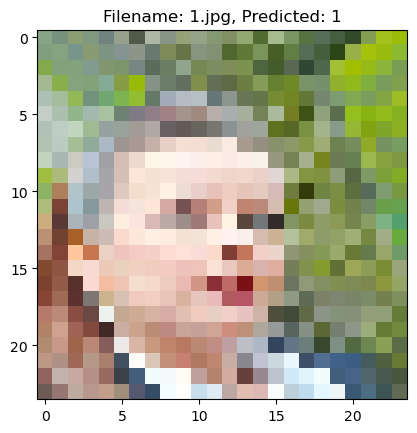

Success!


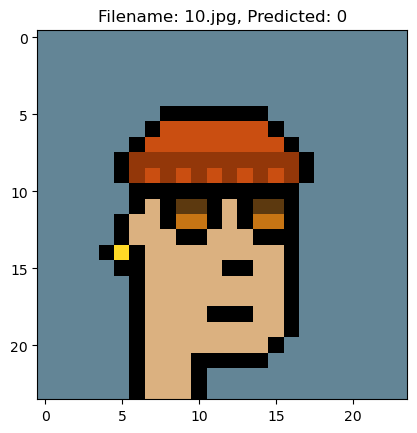

Success!


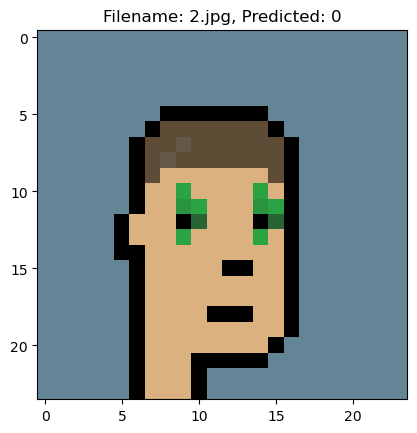

Success!


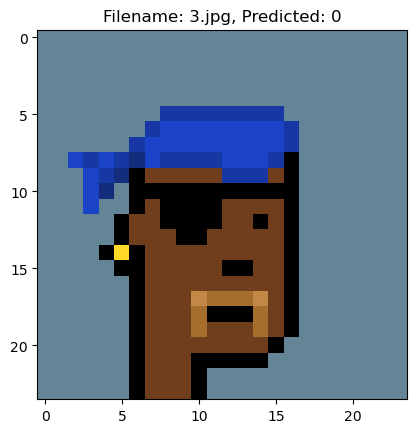

Success!


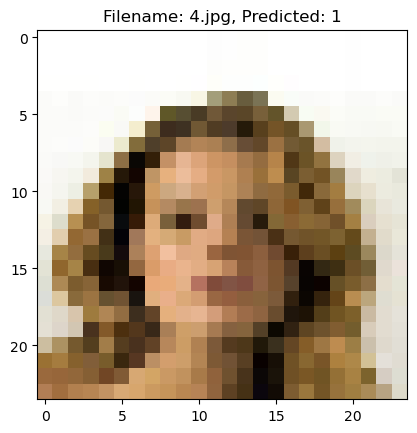

Success!


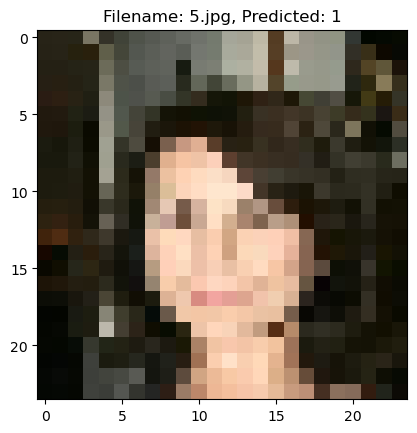

Success!


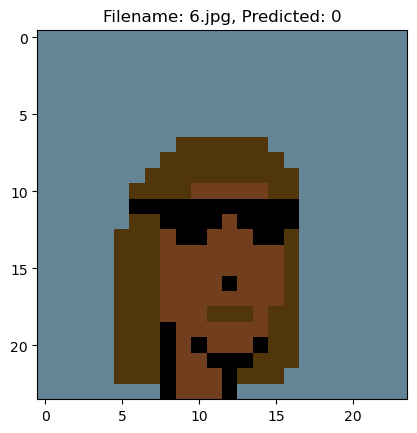

Success!


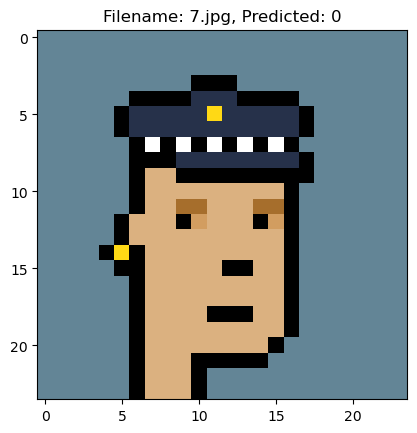

Success!


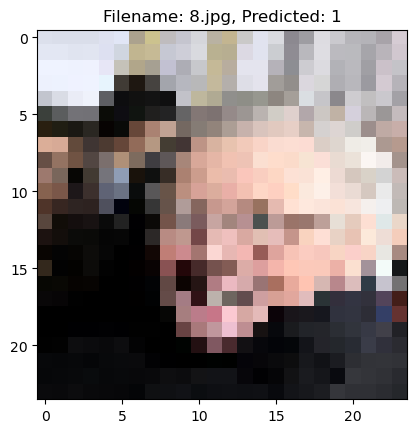

Success!


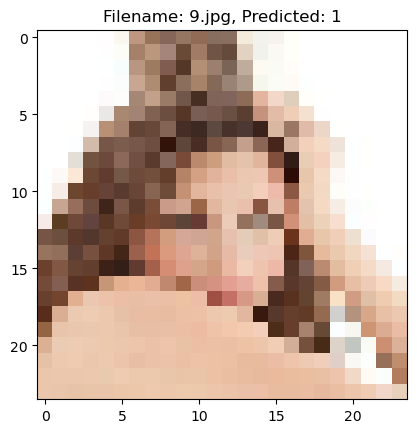

Success!

Final Results: 
Successes: 10 
Errors: 0


In [75]:
# FINAL TEST
import matplotlib.pyplot as plt

# Load and preprocess images
new_images, filenames = load_images_without_labels(new_images_folder)

# Convert to numpy arrays and normalize
new_images = np.array(new_images) / 255.0

# Predict classes for new images
new_predictions = model.predict(new_images)
new_predictions_classes = np.argmax(new_predictions, axis=1)

# Your true labels
true_labels = [1, 0, 0, 0, 1, 1, 0, 0, 1, 1]  # Add your actual labels here

# Initialize counters
success_count = 0
error_count = 0

# For each image, display the image, filename, predicted class
for i in range(len(new_images)):
    plt.imshow(new_images[i])
    plt.title(f'Filename: {filenames[i]}, Predicted: {new_predictions_classes[i]}')
    plt.show()
    
    # Check if the prediction matches the true label
    if new_predictions_classes[i] == true_labels[i]:
        print('Success!')
        success_count += 1
    else:
        print('Error!')
        error_count += 1

# Print final counts
print(f'\nFinal Results: \nSuccesses: {success_count} \nErrors: {error_count}')